# Grade: /100 points

# Assignment 01: Supervised learning, Linear models, and Loss functions

In this assignment, you're going to write your own methods to fit a linear model using either an OLS or LAD cost function.  

## Data set 

For this assignment, we will examine some data representing possums in Australia and New Guinea. The data frame contains 46 observations on the following 6 variables:

* sex: Sex, either m (male) or f (female).
* age: Age in years.
* headL: Head length, in mm.
* skullW: Skull width, in mm.
* totalL: Total length, in cm.
* tailL: Tail length, in cm.

## Follow These Steps Before Submitting

You may need to install packages as follows:

`python -m pip install matplotlib numpy scipy pandas scikit-learn`

Once you are finished, ensure to complete the following steps.

1.  Restart your kernel by clicking 'Kernel' > 'Restart & Run All'.

2.  Fix any errors which result from this.

3.  Repeat steps 1. and 2. until your notebook runs without errors.

4.  Submit your completed notebook to OWL by the deadline.


## Preliminaries

In [22]:
# Import all the necessary packages: 
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import scipy.stats as so
from scipy.optimize import minimize 
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
%matplotlib inline


## Part 1
### Question 1.1:  /10 points


Read in the `possum.csv` file as a `pandas.DataFrame`.  Investigate the relationship between the possum's age and its tail length by plotting a scatter plot of the `age` and `tailL` columns. Add an `alpha`(transparency of the plotted dots) in case some data are overlapping. 

possum data is read


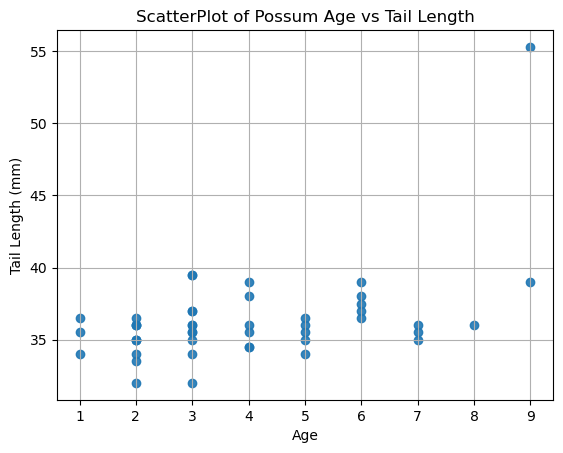

In [23]:
# Read in the data with pandas
possum_data = pd.read_csv("possum.csv")
print("possum data is read")

# Make the scatter plot (don't forget the axis labels)
plt.scatter(possum_data['age'], possum_data['tailL'], alpha=0.9)
plt.title('ScatterPlot of Possum Age vs Tail Length')
plt.xlabel('Age')
plt.ylabel('Tail Length (mm)')
plt.grid(True)
plt.show()

### Question 1.2: /5 point

Recall that the linear model, we obtain predictions by computing 

$$ \hat{\mathbf{y}} = \mathbf{X} \hat{\beta} $$

Here, $\mathbf{X}$ is a design matrix which includes a column of ones, $\hat{\beta}$ are coefficients, and $\hat{\mathbf{y}}$ are outcomes.  Write a function `linearModelPredict` to compute linear model predictions given data and a coefficient vector.  The function should take as it's arguments a 1d-array of coefficients `b` and the design matrix `X` as a 2d-array and return linear model predictions `yp`.

Test the function by setting 

```
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
```
and call your function with these values! 

Report $\hat{\mathbf{y}}$. 
What is the dimensionality of the numpy-array that you get back? 

Hint:  Read the documentation for `np.dot` or the `@` operator in `numpy`.

In [24]:
def linearModelPredict(b,X):
    yp = np.dot(b,X)
    return yp

# Always important: Test the new function you have written! 
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])

# By the way: What happens when b is a 2d-array? 
yp = linearModelPredict(X,b)

yp

array([ 0.1, -0.2,  0.7])

### Question 1.3: /15 points

Write a function `linearModelLossRSS` which computes and returns the loss function for an OLS model parameterized by $\beta$, as well as the gradient of the loss.  The function should take as its first argument a 1d-array `beta` of coefficients for the linear model, as its second argument the design matrix `X` as a 2d-array, and as its third argument a 1d-array `y` of observed outcomes.

Test the function with the values 

```
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
y = np.array([0,0.4,2]) 
```

Report the loss and the gradient. 

**Written answer**: To minimize the cost do you need increase or decrease the value of the parameters? 

In [25]:
def linearModelLossRSS(b,X,y):
    # Compute the predicted values
    y_pred = np.dot(X,b)
    
    # Compute the residuals 
    residuals = y - y_pred
    
    # Compute the Residuals Sum of Squares 
    residual_sum_of_squares  = np.sum (residuals**2)
    
    # Compute the gradient of the RSS with respect to the coefficients b
    gradient = -2 * np.dot(X.T, residuals)
    
    return (residual_sum_of_squares, gradient)

# Test the function with the given values
X = np.array([[1, 0], [1, -1], [1, 2]])
b = np.array([0.1, 0.3])
y = np.array([0, 0.4, 2])

# Call the function to compute the loss and gradient
residual_sum_of_squares, gradient = linearModelLossRSS(b, X, y)

# Output the RSS and gradient
print("Residual Sum of Squares (RSS):", residual_sum_of_squares)
print("Gradient of the loss:", gradient)

Residual Sum of Squares (RSS): 2.06
Gradient of the loss: [-3.6 -4. ]


To minimize the cost , we need to update the parameter values in the opposite direction of the gradient. In this case the gradient values are negetive for both the parameters , we should increase the values of parameters to move towards the minimum. 

The gradient suggests how to adjust the co-effiecnts beta to reducs the loss. If the gradient is negative for a parameter , increasing the parameter will reduce the loss.

### Question 1.4:  /15 points. 

Now that you've implemented a loss function in question 1.3, it is now time to minimize it!

Write a function `linearModelFit` to fit a linear model.  The function should take as its first argument the design matrix `X` as a 2d-array, as its second argument a 1d-array `y` of outcomes, and as its third argument a function  `lossfcn` which returns as a tuple the value of the loss, as well as the gradient of the loss. As a result, it should return the estimated betas and the R2. 

Test the function with the values: 
```
X = np.array([[1,0],[1,-1],[1,2]])
y = np.array([0,0.4,2]) 
```

Report best parameters and the fitted R2 


In [27]:
# Function to fit the model using gradient descent
def linearModelFit(X, y, lossfcn=linearModelLossRSS):
    
    # Initial guess for the coefficients (betas)
    bstart = [0, 0]
    
    # Use scipy's minimize function to optimize the loss function
    RESULT = minimize(lossfcn, bstart, args=(X, y), jac=True)
    estimated_betas = RESULT.x  # Extract the optimized betas
    
    # Compute the predicted values using the final betas
    y_pred = np.dot(X, estimated_betas)
    
    # Calculate R² score
    ss_res = np.sum((y - y_pred) ** 2)  # Residual sum of squares
    ss_tot = np.sum((y - np.mean(y)) ** 2)  # Total sum of squares
    R2 = 1 - (ss_res / ss_tot)  # R² formula
    
    return estimated_betas, R2

# Test the function with the given values
X = np.array([[1, 0], [1, -1], [1, 2]])
y = np.array([0, 0.4, 2])

# Fit the model and get the estimated betas and R² value
estimated_betas, R2 = linearModelFit(X, y, linearModelLossRSS)

# Output the estimated betas and fitted R²
print("Estimated Betas:", estimated_betas)
print("Fitted R²:", R2)

Estimated Betas: [0.6 0.6]
Fitted R²: 0.75


### Question 1.5: /15 points

Use the above functions to fit your model to the possum data. Then use your model and the fitted parameters to make predictions along a grid of equally spaced possum ages.  

Plot the data and add a line for the predicted values. You can get these by generating a new X-matrix with equally spaced ages (using for example np.linspace). Also report the R2 value for the fit. You can do this by either printing out the R2 of the fit or putting it on your plot via the `annotate` function in matplotlib.


In [ ]:
# Extract relevant columns (age and tail length)
ages = possum_data['age'].values
tail_lengths = possum_data['tailL'].values

# Create the design matrix using np.c_ (adding a column of ones for the intercept)
X = np.c_[np.ones(ages.shape[0]), ages]
y = tail_lengths

# Call your fitting function 
estimated_betas, R2 = linearModelFit(X, y, linearModelLossRSS)

# Create the scatter plot (correcting the x-values to use 'ages')
plt.scatter(ages, y, color='blue', label='Actual Data')

# Create a new X matrix with equally spaced data
ages_grid = np.linspace(ages.min(), ages.max(), 100)  # Equally spaced ages
X_grid = np.c_[np.ones(ages_grid.shape), ages_grid]  # Design matrix for predictions

# Generate predictions using the fitted model (estimated betas)
y_pred = np.dot(X_grid, estimated_betas)

# Plot the predicted values as a line
plt.plot(ages_grid, y_pred, color='red', label=f'Predicted (R² = {R2:.2f})')

# Add labels and title
plt.xlabel('Possum Age')
plt.ylabel('Tail Length')
plt.title('Possum Age vs Tail Length with Fitted Line')
plt.legend()

# Optionally annotate the R² value on the plot
plt.annotate(f'R² = {R2:.2f}', xy=(1.05, 0.6), xycoords='axes fraction', fontsize=12, color='red')

# Show the plot
plt.show()

# Output the R² value
print(f"R²: {R2:.2f}")


## Part 2: LAD Regression

### Question 2.1:  /15 points

In the previous section, we worked with the squared loss.  Now, we'll implement a linear model with least absolute deviation loss.

Write a function `linearModelLossLAD` which computes the least absolute deviation loss function for a linear model  parameterized by $\beta$, as well as the gradient of the loss.  The function should take as its first argument a 1d-array `beta` of coefficients for the linear model, as its second argument the design matrix `X` as a 2d-array, and as its third argument a 1d-array `y` of observed outcomes.

Test the function with the values 

```
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
y = np.array([0,0.4,2]) 
```

Report the loss and the gradient. 

In [ ]:
# Define the linearModelLossLAD function
def linearModelLossLAD(beta, X, y):
    # 1. Compute the predicted values (y_pred = X * beta)
    y_pred = np.dot(X, beta)
    
    # 2. Compute the residuals (difference between actual and predicted values)
    residuals = y - y_pred
    
    # 3. Compute the Least Absolute Deviations (LAD) loss
    lad_loss = np.sum(np.abs(residuals))
    
    # 4. Compute the gradient of the LAD loss
    gradient = -np.dot(X.T, np.sign(residuals))
    
    return lad_loss, gradient

# Test the function with the given values
X = np.array([[1, 0], [1, -1], [1, 2]])
b = np.array([0.1, 0.3])
y = np.array([0, 0.4, 2])

# Call the function to compute the loss and gradient
lad_loss, gradient = linearModelLossLAD(b, X, y)

# Output the LAD loss and gradient
print("LAD Loss:", lad_loss)
print("Gradient of the LAD Loss:", gradient)


### Question 2.2: /10 points


Use the above functions to fit your LAD model. Use your model to make predictions along a grid of equally spaced possum ages.  Once fit, add the fitted line to the scatter plot as in question 1.5.  Also report the R2-value. 

**Written answer**: What is the difference in the fit obtained with an L1 as compared to the L2 cost function? Which one has a higher R2 value? Why?  

Note: If you recieve an error from the optimizer, it may be because the loss function for the LAD model is not differentiable at its minimum.  This will lead to some gradient based optimizers to fail to converge.  If this happens to you then pass `method="Powell"` to `scipy.optimize.minimize`.



In [ ]:
# Extract relevant columns (age and tail length)
ages = possum_data['age'].values
tail_lengths = possum_data['tailL'].values

# Create the design matrix using np.c_ (adding a column of ones for the intercept)
X = np.c_[np.ones(ages.shape[0]), ages]
y = tail_lengths

# Define the LAD model fitting function (using Powell method to avoid non-differentiability issues)
def linearModelFitLAD(X, y):
    # Initial guess for the coefficients (betas)
    bstart = [0, 0]
    
    # Use scipy's minimize function with the Powell method
    RESULT = minimize(linearModelLossLAD, bstart, args=(X, y), jac=True, method='Powell')
    estimated_betas = RESULT.x  # Extract the optimized betas
    
    # Compute the predicted values using the final betas
    y_pred = np.dot(X, estimated_betas)
    
    # Calculate R² score
    ss_res = np.sum((y - y_pred) ** 2)  # Residual sum of squares
    ss_tot = np.sum((y - np.mean(y)) ** 2)  # Total sum of squares
    R2 = 1 - (ss_res / ss_tot)  # R² formula
    
    return estimated_betas, R2

# Fit the LAD model to the possum age and tail length data
estimated_betas_lad, R2_lad = linearModelFitLAD(X, y)

# Create a scatter plot for the actual data
plt.scatter(ages, y, color='blue', label='Actual Data')

# Create a new X matrix with equally spaced possum ages for predictions
ages_grid = np.linspace(ages.min(), ages.max(), 100)  # Equally spaced ages
X_grid = np.c_[np.ones(ages_grid.shape), ages_grid]  # Design matrix for predictions

# Generate predictions using the LAD model
y_pred_lad = np.dot(X_grid, estimated_betas_lad)

# Plot the LAD predicted values as a line
plt.plot(ages_grid, y_pred_lad, color='red', label=f'LAD Predicted (R² = {R2_lad:.2f})')

# Add labels and title
plt.xlabel('Possum Age')
plt.ylabel('Tail Length')
plt.title('LAD Model: Possum Age vs Tail Length with Fitted Line')
plt.legend()

# Optionally annotate the R² value on the plot
plt.annotate(f'LAD R² = {R2_lad:.2f}', xy=(1.02, 0.9), xycoords='axes fraction', fontsize=12, color='red')

# Show the plot
plt.show()

# Output the LAD R² value
print(f"LAD R²: {R2_lad:.2f}")

Written answer: The L1 (LAD) model is more robust to outliers becuase it minimizes the absolute deviations. While the L2(OLS) model minimizes the squared deviations which means it is more susceptible to large errors.

R² vlaue for OLS model is typically higher than the LAD model , epspecially in the cases where data has a normal distribution and no major outliers. On the other hand if data does contain outliers , LAD model might give a better fit with a higher R^2 because it is not influenced by extreme values

### Question 2.3: /15 points

Fit an OLS model to the possum data with the `linear_model` module from the `sklearn` package by using the `LinearRegression` class.  In no more than two sentences, comment on the rsquared values from `sklearn` and the rsquared values from your models. Are they similar?

In [ ]:
# Initialize and fit the OLS model using sklearn
ols_model = LinearRegression()
ols_model.fit(ages, tail_lengths)

# Get the predicted values from the OLS model
y_pred_ols = ols_model.predict(ages)

# Calculate the R-squared value using sklearn
R2_sklearn = r2_score(tail_lengths, y_pred_ols)

# Output the R² value from sklearn
print(f"Sklearn OLS R²: {R2_sklearn:.2f}")

The R² values from `skearn` and the custom OLS model should be similar or almost identical because both minimize the same sum of squared residues (L2 normalization)